In [0]:
import requests
import json

url = "https://raw.githubusercontent.com/goncalogteixeira/onlyActionFiles/master/parsedRaw.json"

r = requests.get(url)
houses = json.loads(r.text)
houses
#print( "Number of houses read:" , len(houses) )

# short resume of houses


[{'construction_year': 1975,
  'energetic_cert': 'C',
  'gross_area': '927',
  'img_url': 'https://cdn.21onlineapp.com/assets/images/1_e1f3f9c5-14ec-412f-bc07-f432f1cb7b13.jpg',
  'link': 2027635,
  'location': 'Portugal, Setubal, Montijo, Sarilhos Grandes, Lancada',
  'nbaths': '1',
  'nrooms': '2',
  'price': '175 000 EUR',
  'ref': '0651-03040',
  'state_prop': 'Bom',
  'state_sale': 'Venda',
  'type_prop': 'Moradia',
  'usefull_area': '140'},
 {'construction_year': 1975,
  'energetic_cert': 'C',
  'gross_area': '683',
  'img_url': 'https://cdn.21onlineapp.com/assets/images/-103-_47b8c61f-908c-4746-beda-eca290a2a7ac.jpg',
  'link': 2029719,
  'location': 'Portugal, Coimbra, Lousa, Lousa e Vilarinho, Vila da Lousa (Vilarinho)',
  'nbaths': '1',
  'nrooms': '3',
  'price': '65 000 EUR',
  'ref': 'C0289-00613',
  'state_prop': 'Bom',
  'state_sale': 'Venda',
  'type_prop': 'Moradia',
  'usefull_area': '124'},
 {'construction_year': 1975,
  'energetic_cert': 'C',
  'gross_area': '2 000'

Resumo das casas lidas

In [0]:


from IPython.display import HTML
from IPython.display import Image

for house in houses:
  print (house.get("title") , "," , house.get("location"), "," , house.get("price") )
  print("Detalhes-" , house.get("nbaths") , "," , house.get("nrooms") , ", Area total" ,house.get("gross_area") , ", Area util" ,house.get("useful_area") )

Streaming output truncated to the last 5000 lines.
Detalhes- 1 , 3 , Area total 90 , Area util None
None ,  Lisboa, Misericordia, Santa Catarina , 290 000 EUR
Detalhes- 1 , 1 , Area total 69 , Area util None
None ,  Seixal, Corroios, Santa Marta de Corroios , 118 000 EUR
Detalhes- 2 , 2 , Area total 90 , Area util None
None ,  Lisboa, Avenidas Novas, Parque Eduardo Vii (Sao Sebastiao da Pedreira) , 520 000 EUR
Detalhes- 1 , 5 , Area total 148 , Area util None
None ,  Lisboa, Campo de Ourique, Campo de Ourique (Santo Condestavel) , 225 000 EUR
Detalhes- 1 , 2 , Area total 50 , Area util None
None ,  Setubal, Setubal (Sao Sebastiao), Monte Belo Norte , 216 000 EUR
Detalhes- 3 , 4 , Area total 207 , Area util None
None ,  Almada, Caparica e Trafaria, Sao Joao da Caparica (Caparica) , 269 000 EUR
Detalhes- 2 , 4 , Area total 170 , Area util None
None ,  Ponta Delgada (Acores), Sao Jose (Acores) , 199 000 EUR
Detalhes- 2 , 2 , Area total 126 , Area util None
None ,  Porto, Bonfim , 170 000 

Price By location

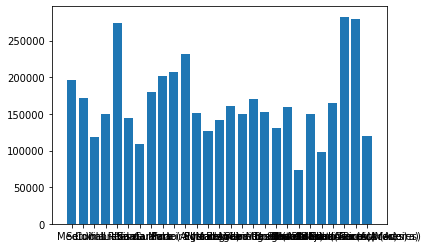

In [0]:
import matplotlib.pyplot as plt

CostByPlace = {}
NumByPlace = {}
CostByPlace["Medio"] = 0
NumByPlace["Medio"] = 0
for house in houses:
    locationaux= house.get("location").split(",")
    location=locationaux[1]
    if location in CostByPlace.keys():
        priceaux = house.get("price").split()
        price=int(priceaux[0]+priceaux[1])
        oldPrice = CostByPlace.get(location)
        CostByPlace[location] = oldPrice+price
        NumByPlace[location]= NumByPlace[location]+1
        CostByPlace["Medio"] = CostByPlace["Medio"] + price
        NumByPlace["Medio"] = NumByPlace["Medio"] +1
    else:
        NumByPlace[location]= 1
        NumByPlace["Medio"] = NumByPlace["Medio"] +1
        priceaux = house.get("price").split()
        price = int(priceaux[0] + priceaux[1])
        CostByPlace[location] = price
        CostByPlace["Medio"] = CostByPlace["Medio"] + price

for key in CostByPlace.keys():
    CostByPlace[key]= CostByPlace[key]/ NumByPlace[key]


CostByPlace = {k: v for k, v in sorted(CostByPlace.items(), key=lambda item: item[1])}
print(CostByPlace)
print( list(reversed(list(CostByPlace.keys())))[0:3])

plt.bar(range(5),  list(reversed(list(CostByPlace.values())))[0:5], align='center')
plt.xticks(range(5), list(reversed(list(CostByPlace.keys())))[0:5])
plt.show()

Square Feet by location

{'Medio': 31847875, ' Setubal': 3609629, ' Coimbra': 1301161, ' Vila Real': 380909, ' Lisboa': 1786040, ' Viseu': 716239, ' Santarem': 1964520, ' Guarda': 332771, ' Porto': 1126001, ' Ilha da Madeira (Madeira)': 192309, ' Faro (Algarve)': 8763034, ' Evora': 3842322, ' Portalegre': 463414, ' Braga': 1563478, ' Aveiro': 395576, ' Leiria': 1141860, ' Ilha de Sao Miguel (Acores)': 1257228, ' Viana do Castelo': 887671, ' Braganca': 23357, ' Castelo Branco': 69115, ' Ilha de Santa Maria (Acores)': 844, ' Beja': 2006392, ' Ilha do Faial (Acores)': 2525, ' Ilha da Graciosa (Acores)': 80, ' Ilha de Porto Santo (Madeira)': 20354, ' Ilha do Pico (Acores)': 934, ' Ilha Terceira (Acores)': 112}


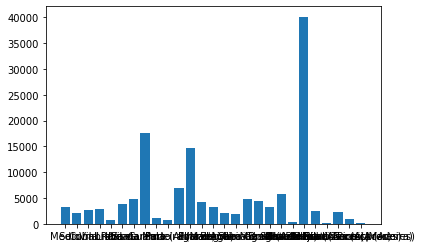

In [0]:
import matplotlib.pyplot as plt

AreaByPlace = {}
NumOfArea = {}
AreaByPlace["Medio"] = 0
NumOfArea["Medio"] = 0
for house in houses:
    locationaux= house.get("location").split(",")
    location=locationaux[1]
    if location in AreaByPlace.keys():
      #fix if area >= 1 000 cause space gets added
        priceaux2 = house.get("gross_area")
        if len(house.get("gross_area")) > 3:
          priceaux = house.get("gross_area").split()
          priceaux2 = priceaux[0] + priceaux[1]
        price = int(priceaux2)
        oldPrice = AreaByPlace.get(location)
        AreaByPlace[location] = oldPrice+price
        NumOfArea[location]= NumOfArea[location]+1
        AreaByPlace["Medio"] = AreaByPlace["Medio"] + price
        NumOfArea["Medio"] = NumOfArea["Medio"] +1
    else:
        NumOfArea[location]= 1
        NumOfArea["Medio"] = NumOfArea["Medio"] +1
        priceaux2 = house.get("gross_area")
        if len(house.get("gross_area")) > 3:
          priceaux = house.get("gross_area").split()
          priceaux2 = priceaux[0] + priceaux[1]
        price = int(priceaux2)
        AreaByPlace[location] = price
        AreaByPlace["Medio"] = AreaByPlace["Medio"] + price


for key in AreaByPlace.keys():
    AreaByPlace[key]= AreaByPlace[key]/ NumOfArea[key]


AreaByPlace = {k: v for k, v in sorted(AreaByPlace.items(), key=lambda item: item[1])}
print(AreaByPlace)
print( list(reversed(list(AreaByPlace.keys())))[0:3])

plt.bar(range(5),  list(reversed(list(AreaByPlace.values())))[0:5], align='center')
plt.xticks(range(5), list(reversed(list(AreaByPlace.keys())))[0:5])
plt.show()



Price By square foot by Location

{'Medio': 10830315.980279746, ' Setubal': 1679589.9482899075, ' Coimbra': 234774.99258710913, ' Vila Real': 52361.172481973445, ' Lisboa': 4801238.487713263, ' Viseu': 88275.12737907488, ' Santarem': 132606.562374962, ' Guarda': 6533.03030767222, ' Porto': 1227048.5118189878, ' Ilha da Madeira (Madeira)': 198730.9347050301, ' Faro (Algarve)': 1406751.6038566679, ' Evora': 141296.31186790403, ' Portalegre': 45052.620597803296, ' Braga': 168688.8061961569, ' Aveiro': 84541.24663035909, ' Leiria': 329759.6427172479, ' Ilha de Sao Miguel (Acores)': 133867.5344957496, ' Viana do Castelo': 63708.11010604384, ' Braganca': 3444.0938947789386, ' Castelo Branco': 5686.079906206691, ' Ilha de Santa Maria (Acores)': 426.60586835844566, ' Beja': 19424.492265185956, ' Ilha do Faial (Acores)': 39.00990099009901, ' Ilha da Graciosa (Acores)': 2062.5, ' Ilha de Porto Santo (Madeira)': 3037.3398796173824, ' Ilha do Pico (Acores)': 299.78586723768734, ' Ilha Terceira (Acores)': 1071.4285714285713}
{'Medi

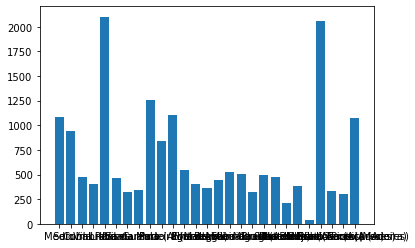

In [0]:
import matplotlib.pyplot as plt

CostbySquareMeter = {}
NumOfPlace = {}
CostbySquareMeter["Medio"] = 0
NumOfPlace["Medio"] = 0
for house in houses:
    locationaux= house.get("location").split(",")
    location=locationaux[1]
    if location in CostbySquareMeter.keys():
        priceaux2 = house.get("gross_area")
        if len(house.get("gross_area")) > 3:
          priceaux = house.get("gross_area").split()
          priceaux2 = priceaux[0] + priceaux[1]
        grossArea = int(priceaux2)
        priceaux = house.get("price").split()
        price=int(priceaux[0]+priceaux[1])/grossArea
        #print ( location , grossArea , price , price/grossArea)
        oldPrice = CostbySquareMeter.get(location)
        CostbySquareMeter[location] = oldPrice+price
        NumOfPlace[location]= NumOfPlace[location]+1
        CostbySquareMeter["Medio"] = CostbySquareMeter["Medio"] + price
        NumOfPlace["Medio"] = NumOfPlace["Medio"] +1
    else:
        NumOfPlace[location]= 1
        priceaux2 = house.get("gross_area")
        if len(house.get("gross_area")) > 3:
          priceaux = house.get("gross_area").split()
          priceaux2 = priceaux[0] + priceaux[1]
        grossArea = int(priceaux2)
        NumOfPlace["Medio"] = NumOfPlace["Medio"] +1
        priceaux = house.get("price").split()
        price = int(priceaux[0] + priceaux[1])/grossArea
        CostbySquareMeter[location] = price
        CostbySquareMeter["Medio"] = CostbySquareMeter["Medio"] + price


print(CostbySquareMeter)
for key in CostbySquareMeter.keys():
    CostbySquareMeter[key]= CostbySquareMeter[key]/ NumOfPlace[key]

CostbySquareMeter = {k: v for k, v in sorted(CostbySquareMeter.items(), key=lambda item: item[1])}
print(CostbySquareMeter)
print( list(reversed(list(CostbySquareMeter.keys())))[0:3])

plt.bar(range(5),  list(reversed(list(CostbySquareMeter.values())))[0:5], align='center')
plt.xticks(range(5), list(reversed(list(CostbySquareMeter.keys())))[0:5])
plt.show()


Price By gross area

ERROR! Session/line number was not unique in database. History logging moved to new session 59


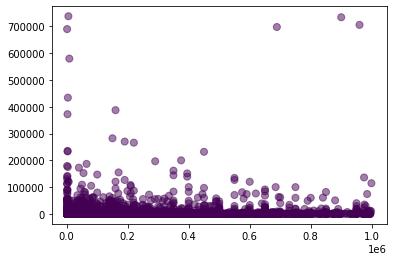

In [0]:

import matplotlib.pyplot as plt

GrossArea=[]
Price=[]
colors=[]
area=[]
for house in houses:
    priceaux2 = house.get("gross_area")
    if len(house.get("gross_area")) > 3:
      priceaux = house.get("gross_area").split()
      priceaux2 = priceaux[0] + priceaux[1]
    grossArea = int(priceaux2)
    GrossArea.append(grossArea)
    priceaux = house.get("price").split()
    price = int(priceaux[0] + priceaux[1])
    Price.append(price)
    colors.append(0.75)
    area.append(50)




plt.scatter(Price, GrossArea, s=area, c=colors, alpha=0.5)
plt.show()



Experiences with ipyleaflet

In [3]:
!pip install ipyleaflet

In [5]:

from ipyleaflet import Map, Marker, LayersControl

m = Map(center=(50, 0), zoom=5)

marker1 = Marker(name='marker1', location=(48, -2))
marker2 = Marker(name='marker2', location=(50, 0))
marker3 = Marker(name='marker3', location=(52, 2))
m.add_layer(marker1)
m.add_layer(marker2)
m.add_layer(marker3)

control = LayersControl(position='topright')
m.add_control(control)

m

Map(center=[50, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…